In [9]:
from math import ceil

from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle as rectangle
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from rectpack import newPacker, PackingBin

In [10]:
rectangles = []
area = 0
for i in range(10):
    height = np.random.randint(2, 5)
    rectangles.append((height, height))
    area += height**2
bins = [(12, ceil(area/12))]

packer = newPacker(bin_algo=PackingBin.BBF)

# Add the rectangles to packing queue
for r in rectangles:
    packer.add_rect(*r)

# Add the bins where the rectangles will be placed
for b in bins:
    packer.add_bin(*b)

# Start packing
packer.pack()

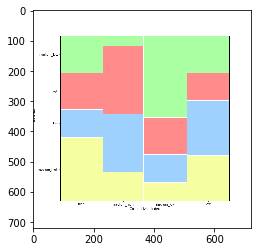

In [8]:
img = mpimg.imread('Cost of Living Index_Climate Index.png')
plt.imshow(img)

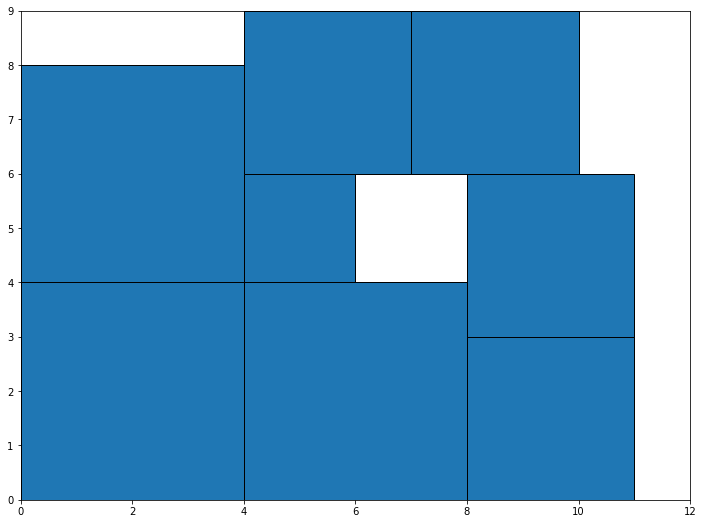

In [11]:
fig, ax = plt.subplots(1, figsize=bins[0])
ax.set_xlim([0, bins[0][0]])
ax.set_ylim([0, bins[0][1]])
for rect in packer[0]:
    ax.add_patch(rectangle((rect.x, rect.y), rect.height, rect.width, alpha=1))
    ax.add_patch(rectangle((rect.x, rect.y), rect.height, rect.width, fill=None, alpha=1))
plt.show()